In [ ]:
from google.colab import drive
drive.mount('./gdrive')
%cd './gdrive/MyDrive/AI INSIGHT 2020/W3'

Mounted at ./gdrive
/content/gdrive/MyDrive/AI INSIGHT 2020/W3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Load data**

In [ ]:
data = np.genfromtxt('iris_full.csv', skip_header=1, delimiter=',')
data_size = data.shape[0]
inds = np.arange(data_size)
np.random.shuffle(inds)
data = data[inds]

X = data[:, :4]
intercept = np.ones((data_size, 1))
X = np.concatenate((X, intercept), axis=1)
Y = data[:, 4]

train_size = round(data_size*0.8)
X_train = X[0:train_size]
Y_train = Y[0:train_size]

X_test = X[train_size:]
Y_test = Y[train_size:]

# **Stochastic**

In [ ]:
def predict(x, theta):
    z = np.dot(theta.T, x)
    return np.exp(z-np.max(z))/np.sum(np.exp(z-np.max(z)))

def compute_loss(y_hat, delta):
    return -np.sum(delta*np.log(y_hat))

def compute_grad(x, y_hat, delta):
    return np.multiply(x, (y_hat-delta).T)

In [ ]:
n_classes = len(set(Y.tolist()))
n_features = 4

theta = np.random.randn(n_features+1, n_classes)

eta = 0.01
losses = []
accuracy_train = []
accuracy_test = []
n_epochs = 50
m = 1
for epoch in range(n_epochs):
    for i in range(train_size):
        x = X_train[i:i+m].T
        y = Y_train[i:i+m]

        delta = np.arange(n_classes).reshape(n_classes, m) == y
        print('Delta: ', delta)
        
        y_hat = predict(x, theta)

        loss = compute_loss(y_hat, delta)
        losses.append(loss)
        print('Loss: ', loss)

        grad = compute_grad(x, y_hat, delta)

        theta = theta - eta*grad
        print('Theta: ', theta)

        # Evaluate
        pred_train = predict(X_train.T, theta)
        acc_train = (np.argmax(pred_train, axis=0) == Y_train).mean()
        accuracy_train.append(acc_train)

        pred_test = predict(X_test.T, theta)
        acc_test = (np.argmax(pred_test, axis=0) == Y_test).mean()
        accuracy_test.append(acc_test)
        print('Accuracy: [train set]: {}, [test set]: {}'.format(acc_train, acc_test))

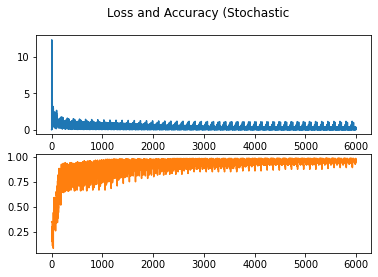

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy (Stochastic')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy_train, 'tab:orange')

In [ ]:
delta*np.log(y_hat)

array([[-0.        ],
       [-0.31044088],
       [-0.        ]])

# **Mini-batches**

In [ ]:
def predict_batch(x, theta):
    z = np.dot(theta.T, x)
    return np.exp(z-np.max(z))/np.sum(np.exp(z-np.max(z)), axis=0)

def compute_loss_batch(y_hat, delta, batch_size):
    a = -np.sum(delta*np.log(y_hat), axis=0).reshape(1, batch_size)
    print('a: ', a)
    return a.mean(axis=1)

def compute_grad_batch(x, y_hat, delta, batch_size):
    return np.dot(x, (y_hat-delta).T)/batch_size

In [ ]:
n_classes = len(set(Y.tolist()))
n_features = 4

theta = np.random.randn(n_features+1, n_classes)

eta = 0.01
losses = []
accuracy_train = []
accuracy_test = []
n_epochs = 80
m = 32
for epoch in range(n_epochs):
    for i in range(0, train_size, m):
        if i+m > train_size:
            batch_size = train_size - i
        else:
            batch_size = m

        x = X_train[i:i+batch_size].T
        y = Y_train[i:i+batch_size].reshape(1, batch_size)

        delta = np.tile(np.arange(n_classes).reshape(n_classes, 1), (1, batch_size)) == y

        y_hat = predict_batch(x, theta)

        loss = compute_loss_batch(y_hat, delta, batch_size)
        losses.append(loss)
        print('Loss: ', loss)

        grad = compute_grad_batch(x, y_hat, delta, batch_size)

        theta = theta - eta*grad
        print('Theta: ', theta)

        # Evaluate
        pred_train = predict_batch(X_train.T, theta)
        acc_train = (np.argmax(pred_train, axis=0) == Y_train).mean()
        accuracy_train.append(acc_train)

        pred_test = predict_batch(X_test.T, theta)
        acc_test = (np.argmax(pred_test, axis=0) == Y_test).mean()
        accuracy_test.append(acc_test)
        print('Accuracy: [train set]: {}, [test set]: {}'.format(acc_train, acc_test))

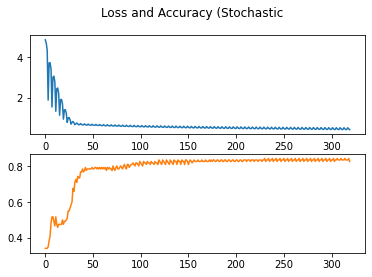

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loss and Accuracy (Stochastic')
ax1.plot(losses, 'tab:blue')
ax2.plot(accuracy_train, 'tab:orange')